***Liên kết Google Colab với Google Drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Truy cập vào thư mục content của Google Colab***

In [2]:
import os
os.chdir("/content")

In [3]:
#import os
#import glob
#fileList = glob.glob('/content/drive/MyDrive/T*.jpg')
#print("Number of files: ",len(fileList))
    
#for filePath in fileList:
  #try:
    #os.remove(filePath)
  #except:
    #print("Error while deleting file : ", filePath)

***Giải nén file zip từ Google Drive***

In [4]:
!unzip /content/drive/MyDrive/APP-CQ18/plant-pathology-2020-fgvc7.zip

Archive:  /content/drive/MyDrive/APP-CQ18/plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: im

***Nhập vào các thư viện cần thiết***

In [5]:
import glob 
import cv2 
from google.colab.patches import cv2_imshow

import pandas as pd
import matplotlib.pyplot as plt

***Lưu các hình ảnh train và test vào biến mới***

In [6]:
test_dir = glob.glob('/content/images/Test*.jpg')  
train_dir = glob.glob('/content/images/Train*.jpg')  

In [7]:
train_dir = sorted(train_dir, key = lambda x: (len(x), x))
test_dir = sorted(test_dir, key = lambda x: (len(x), x))

In [8]:
test = [] 
train = [] 
scale = 0.5

for f in test_dir: 
  img = cv2.imread(f)
  width = int(img.shape[1] * scale)
  height = int(img.shape[0] * scale)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  test.append(resized) 

for f in train_dir: 
  img = cv2.imread(f)
  width = int(img.shape[1] * scale)
  height = int(img.shape[0] * scale)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  train.append(resized) 

In [9]:
len(test), len(train)

(1821, 1821)

***Khám phá dữ liệu file csv***

In [10]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
sam_sub_csv = pd.read_csv('sample_submission.csv')

train_csv.head(3), test_csv.head(3), sam_sub_csv.head(3)

(  image_id  healthy  multiple_diseases  rust  scab
 0  Train_0        0                  0     0     1
 1  Train_1        0                  1     0     0
 2  Train_2        1                  0     0     0,   image_id
 0   Test_0
 1   Test_1
 2   Test_2,   image_id  healthy  multiple_diseases  rust  scab
 0   Test_0     0.25               0.25  0.25  0.25
 1   Test_1     0.25               0.25  0.25  0.25
 2   Test_2     0.25               0.25  0.25  0.25)

In [11]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


- Dữ liệu huấn luyện gồm có 1821 hình ảnh và nhãn của chúng. 
- Không có dữ liệu rỗng
- Ý nghĩa các cột:
    - `image_id`: tên file hình ảnh
    - `healthy`: 1 nếu cây khỏe mạnh, 0 nếu ngược lại
    - `multiple_diseases`: 1 nếu cây có nhiều bệnh cùng lúc, 0 nếu ngược lại
    - `rust`: 1 nếu cây bị bệnh rust, 0 nếu ngược lại 
    - `scab`: 1 nếu cây bị bệnh scab, 0 nếu ngược lại

In [12]:
train_csv = train_csv.drop('image_id', axis = 1)
train_csv.value_counts()

healthy  multiple_diseases  rust  scab
0        0                  1     0       622
                            0     1       592
1        0                  0     0       516
0        1                  0     0        91
dtype: int64

(array([0]), <a list of 1 Text major ticklabel objects>)

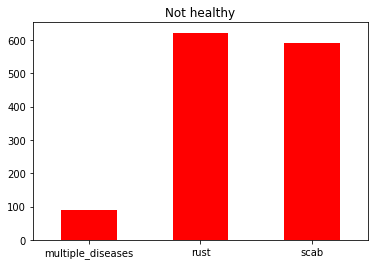

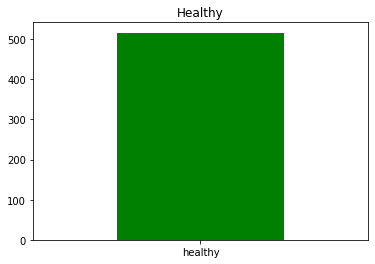

In [13]:
fig, axes = plt.subplots(1,1)

not_healthy = train_csv.loc[(train_csv.healthy == 0), ['multiple_diseases', 'rust', 'scab']]
pd.Series(not_healthy.sum()).plot.bar(title = 'Not healthy', color = 'red')
plt.xticks(rotation = 0)

fig, axes = plt.subplots(1,1)

healthy = train_csv.loc[(train_csv.healthy == 1), ['healthy']]
pd.Series(healthy.sum()).plot.bar(title = 'Healthy', color = 'green')
plt.xticks(rotation = 0)

- Mỗi hình ảnh chỉ thuộc về một loại duy nhất trong tập {healthy, multiple_diseases, rust, scab}
- Lượng hình ảnh của mỗi loại trong {rust, scab, healthy} khá tương đồng, tuy nhiên lượng hình ảnh của multiple_diseases ít hơn hẳn 

***Chuẩn bị dữ liệu file csv***

In [14]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
sam_sub_csv = pd.read_csv('sample_submission.csv')

train_csv.head(3), test_csv.head(3), sam_sub_csv.head(3)

(  image_id  healthy  multiple_diseases  rust  scab
 0  Train_0        0                  0     0     1
 1  Train_1        0                  1     0     0
 2  Train_2        1                  0     0     0,   image_id
 0   Test_0
 1   Test_1
 2   Test_2,   image_id  healthy  multiple_diseases  rust  scab
 0   Test_0     0.25               0.25  0.25  0.25
 1   Test_1     0.25               0.25  0.25  0.25
 2   Test_2     0.25               0.25  0.25  0.25)

In [15]:
train_label = train_csv.melt(['image_id'])
train_label.drop(index=train_label[train_label['value'] == 0].index, inplace=True)
train_label.head(3)

,image_id,variable,value
2,Train_2,healthy,1
4,Train_4,healthy,1
5,Train_5,healthy,1


In [16]:
train_csv = train_csv.merge(train_label, on='image_id')
train_csv.drop(columns=['value'], inplace=True)
train_csv.rename(columns={'variable': 'class'}, inplace=True)
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab,class
0,Train_0,0,0,0,1,scab
1,Train_1,0,1,0,0,multiple_diseases
2,Train_2,1,0,0,0,healthy


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_csv['label'] = le.fit_transform(train_csv['class'])
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab,class,label
0,Train_0,0,0,0,1,scab,3
1,Train_1,0,1,0,0,multiple_diseases,1
2,Train_2,1,0,0,0,healthy,0


In [18]:
train_csv['image'] = train
test_csv['image'] = test

train_csv.head(3), test_csv.head(3)

(  image_id  healthy  multiple_diseases  rust  scab              class  label  \
 0  Train_0        0                  0     0     1               scab      3   
 1  Train_1        0                  1     0     0  multiple_diseases      1   
 2  Train_2        1                  0     0     0            healthy      0   
 
                                                image  
 0  [[[13, 51, 33], [13, 51, 33], [14, 52, 34], [1...  
 1  [[[215, 215, 203], [217, 217, 205], [220, 220,...  
 2  [[[109, 124, 120], [110, 126, 122], [112, 126,...  ,
   image_id                                              image
 0   Test_0  [[[54, 148, 101], [53, 148, 98], [51, 146, 96]...
 1   Test_1  [[[26, 118, 71], [24, 116, 69], [26, 116, 70],...
 2   Test_2  [[[66, 69, 84], [66, 69, 84], [66, 68, 84], [6...)

In [19]:
healthy = train_csv[train_csv.healthy==1]['image']
multiple_diseases = train_csv[train_csv.multiple_diseases==1]['image']
rust = train_csv[train_csv.rust==1]['image']
scab = train_csv[train_csv.scab==1]['image']

list_healthy = list(healthy)
list_multiple_diseases = list(multiple_diseases)
list_rust = list(rust)
list_scab = list(scab)

**Tài liệu tham khảo** https://www.geeksforgeeks.org/image-processing-without-opencv-python/

In [20]:
import numpy as np

def resize(image, scale_height, scale_width): # resize image function with scale is in range (0, 1)
  height, width, channel = image.shape[:] # get height, width, channel in shape of image

  new_height = int(height * scale_height) # new height after height scaled
  new_width = int(width * scale_width) # new width after width scaled

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(new_width):
    array_width.append(array_channel)
  for k in range(new_height):
    array_height.append(array_width)

  new_image = np.array(array_height)
  
  #new_image = np.zeros([new_height, new_width, channel]) # create matrix has 0 values 
  # with new height (vertical), new width (horizontal) 
  # and channel with 3 attribute [R, G, B] values

  for i in range(new_height): # iterate vertical pixel in new height
   for j in range(new_width): # iterate horizontal pixel in new width
    new_image[i, j] = image[int(i / scale_height), int(j / scale_width)] # root image has bigger size than new image, pixels in root image
    # have smaller size than new image. Because scale is in range (0, 1) so that pixels divide to scale

  return new_image # return new image

In [21]:
def gray(image): # gray image function
  height, width, channel = image.shape[:] # get height, width, channel in shape of image 

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(width):
    array_width.append(array_channel)
  for k in range(height):
    array_height.append(array_width)

  new_image = np.array(array_height)

  #new_image = np.zeros([height, width, channel]) # create matrix has 0 values 
  # with height (vertical), width (horizontal) 
  # and channel with 3 attribute [R, G, B] values

  for i in range(height): # iterate vertical pixel in height
   for j in range(width): # iterate horizontal pixel in width
    list_rgb = [float(image[i][j][0]), float(image[i][j][1]), float(image[i][j][2])] # list of red, green and blue pixels
    average_value = (list_rgb[0] + list_rgb[1] + list_rgb[2]) / 3 # calculate mean of elements of list rgb
    new_image[i][j][0] = average_value # set red pixels = average value
    new_image[i][j][1] = average_value # set green pixels = average value
    new_image[i][j][2] = average_value # set blue pixels = average value
    
  return new_image # return new image

In [22]:
def blur(image): # blur image function
  height, width, channel = image.shape[:] # get height, width, channel in shape of image 

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(width):
    array_width.append(array_channel)
  for k in range(height):
    array_height.append(array_width)

  new_image = np.array(array_height)

  #new_image = np.zeros([height, width, channel]) # create matrix has 0 values 
  # with height (vertical), width (horizontal) 
  # and channel with 3 attribute [R, G, B] values
  
  #kernel_filter = np.ones((3, )) / 3
  for i in range(height - 2): # iterate vertical pixel in height
   for j in range(width - 2): # iterate horizontal pixel in width
    for k in [0, 1, 2]:
      list_nearest = [float(image[i + k, j + k][k]), float(image[i - k, j - k][k]), float(image[i, j + k][k]), float(image[i, j - k][k]), \
                      float(image[i + k, j][k]), float(image[i - k, j][k]), float(image[i + k, j - k][k]), float(image[i - k, j + k][k])]
                
      #new_image[i, j][k] = np.mean(list_nearest)
                    
      new_image[i, j][k] = (image[i + k, j + k][k] + image[i - k, j - k][k] + image[i, j + k][k] + image[i, j - k][k] + \
                      image[i + k, j][k] + image[i - k, j][k] + image[i + k, j - k][k] + image[i - k, j + k][k]) / (len(list_nearest))

      #new_image[i, j][k] = (4*image[i,j][k] + image[i-1,j][k] + image[i+1,j][k] + image[i,j-1][k] + image[i,j+1][k])/8.0  

  return new_image #return new image

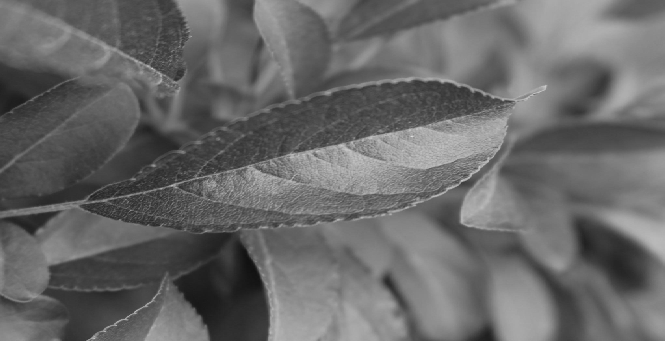

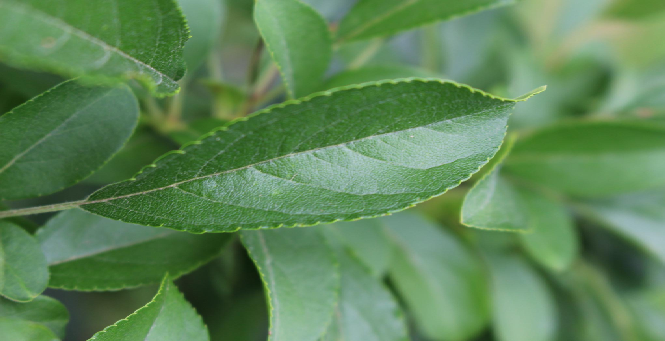

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


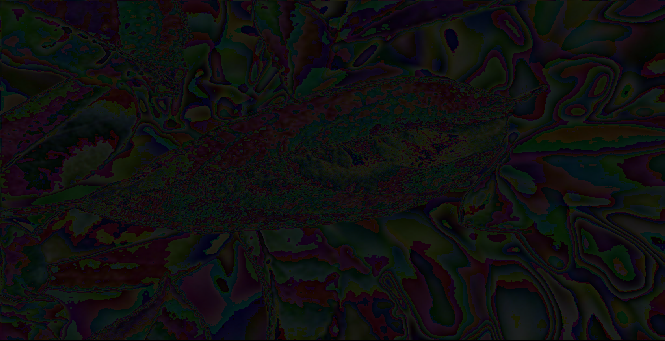

In [23]:
#test resize, gray, blur image function
cv2_imshow(resize(gray(train[100]), 0.5, 0.65))
cv2_imshow(resize(train[100], 0.5, 0.65))
cv2_imshow(resize(blur(train[100]), 0.5, 0.65))

In [40]:
from numba import njit, prange

@njit(nopython = True, nogil = True, parallel = True, fastmath = True, cache = True, forceobj = True, looplift = True)
def resize_parallel(image, scale_height, scale_width): # resize image function with scale is in range (0, 1)
  height, width, channel = image.shape[:] # get height, width, channel in shape of image (height, width, channel)

  new_height = int(height * scale_height) # new height after height scaled
  new_width = int(width * scale_width) # new width after width scaled
  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(new_width):
    array_width.append(array_channel)
  for k in range(new_height):
    array_height.append(array_width)

  new_image = np.array(array_height)

  #new_image = np.zeros([new_height, new_width, channel]) # create matrix has 0 values 
  # with new height (vertical), new width (horizontal) 
  # and channel with 3 attribute [R, G, B] values

  for i in prange(new_height): # iterate vertical pixel in new height
   for j in prange(new_width): # iterate horizontal pixel in new width
    new_image[i, j]= image[int(i / scale_height), int(j / scale_width)] # root image has bigger size than new image, pixels in root image
    # have smaller size than new image. Because scale is in range (0, 1) so that pixels divide to scale

  return new_image # return new image

/usr/local/lib/python3.7/dist-packages/numba/core/decorators.py:252: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numba/core/decorators.py:254: RuntimeWarning: forceobj is set for njit and is ignored
  warnings.warn('forceobj is set for njit and is ignored', RuntimeWarning)


In [56]:
@njit(nopython = True, nogil = True, parallel = True, fastmath = True, cache = True, forceobj = True, looplift = True)
def gray_parallel(image): # gray image function
  height, width, channel = image.shape[:] # get height, width, channel in shape of image 

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(width):
    array_width.append(array_channel)
  for k in range(height):
    array_height.append(array_width)

  new_image = np.array(array_height)

  #new_image = np.zeros([height, width, channel]) # create matrix has 0 values 
  # with height (vertical), width (horizontal) 
  # and channel with 3 attribute [R, G, B] values

  for i in prange(height): # iterate vertical pixel in height
   for j in prange(width): # iterate horizontal pixel in width
    list_rgb = [float(image[i][j][0]), float(image[i][j][1]), float(image[i][j][2])] # list of red, green and blue pixels
    average_value = (list_rgb[0] + list_rgb[1] + list_rgb[2]) / 3 # calculate mean of elements of list rgb
    new_image[i][j][0] = average_value # set red pixels = average value
    new_image[i][j][1] = average_value # set green pixels = average value
    new_image[i][j][2] = average_value # set blue pixels = average value
    
  return new_image # return new image

/usr/local/lib/python3.7/dist-packages/numba/core/decorators.py:252: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numba/core/decorators.py:254: RuntimeWarning: forceobj is set for njit and is ignored
  warnings.warn('forceobj is set for njit and is ignored', RuntimeWarning)


In [57]:
@njit(nopython = True, nogil = True, parallel = True, fastmath = True, cache = True, forceobj = True, looplift = True)
def blur_parallel(image): # blur image function
  height, width, channel = image.shape[:] # get height, width, channel in shape of image 

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(width):
    array_width.append(array_channel)
  for k in range(height):
    array_height.append(array_width)

  new_image = np.array(array_height)

  #new_image = np.zeros([height, width, channel]) # create matrix has 0 values 
  # with height (vertical), width (horizontal) 
  # and channel with 3 attribute [R, G, B] values
  
  #kernel_filter = np.ones((3, )) / 3
  for i in prange(height - 2): # iterate vertical pixel in height
   for j in prange(width - 2): # iterate horizontal pixel in width
    for k in [0, 1, 2]:
      list_nearest = [float(image[i + k, j + k][k]), float(image[i - k, j - k][k]), float(image[i, j + k][k]), float(image[i, j - k][k]), \
                      float(image[i + k, j][k]), float(image[i - k, j][k]), float(image[i + k, j - k][k]), float(image[i - k, j + k][k])]
                
      #new_image[i, j][k] = np.mean(list_nearest)
                    
      new_image[i, j][k] = (image[i + k, j + k][k] + image[i - k, j - k][k] + image[i, j + k][k] + image[i, j - k][k] + \
                      image[i + k, j][k] + image[i - k, j][k] + image[i + k, j - k][k] + image[i - k, j + k][k]) / (len(list_nearest))

      #new_image[i, j][k] = (4*image[i,j][k] + image[i-1,j][k] + image[i+1,j][k] + image[i,j-1][k] + image[i,j+1][k])/8.0  

  return new_image #return new image

/usr/local/lib/python3.7/dist-packages/numba/core/decorators.py:252: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numba/core/decorators.py:254: RuntimeWarning: forceobj is set for njit and is ignored
  warnings.warn('forceobj is set for njit and is ignored', RuntimeWarning)


In [58]:
%%time
resize(train[150], 0.4, 0.6)

CPU times: user 275 ms, sys: 8.02 ms, total: 283 ms
Wall time: 282 ms


array([[[ 90., 149., 151.],
        [ 90., 149., 151.],
        [ 90., 149., 151.],
        ...,
        [ 44.,  71.,  62.],
        [ 45.,  73.,  60.],
        [ 45.,  73.,  60.]],

       [[ 90., 151., 153.],
        [ 90., 151., 153.],
        [ 90., 151., 153.],
        ...,
        [ 42.,  69.,  60.],
        [ 42.,  70.,  57.],
        [ 42.,  70.,  57.]],

       [[ 89., 154., 155.],
        [ 89., 154., 155.],
        [ 89., 154., 155.],
        ...,
        [ 40.,  67.,  58.],
        [ 39.,  67.,  54.],
        [ 39.,  67.,  54.]],

       ...,

       [[ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        ...,
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.]],

       [[ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        ...,
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.]],

       [[ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        [ 11.,  

In [63]:
%%time
resize_parallel(train[150], 0.4, 0.6)

CPU times: user 4.17 ms, sys: 6.99 ms, total: 11.2 ms
Wall time: 12.7 ms


array([[[ 90., 149., 151.],
        [ 90., 149., 151.],
        [ 90., 149., 151.],
        ...,
        [ 44.,  71.,  62.],
        [ 45.,  73.,  60.],
        [ 45.,  73.,  60.]],

       [[ 90., 151., 153.],
        [ 90., 151., 153.],
        [ 90., 151., 153.],
        ...,
        [ 42.,  69.,  60.],
        [ 42.,  70.,  57.],
        [ 42.,  70.,  57.]],

       [[ 89., 154., 155.],
        [ 89., 154., 155.],
        [ 89., 154., 155.],
        ...,
        [ 40.,  67.,  58.],
        [ 39.,  67.,  54.],
        [ 39.,  67.,  54.]],

       ...,

       [[ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        ...,
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.]],

       [[ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        ...,
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.],
        [ 11.,  13.,  14.]],

       [[ 11.,  28.,  19.],
        [ 11.,  28.,  19.],
        [ 11.,  

In [64]:
%%time
gray(train[150])

CPU times: user 2.41 s, sys: 49.9 ms, total: 2.46 s
Wall time: 2.46 s


array([[[130.        , 130.        , 130.        ],
        [130.        , 130.        , 130.        ],
        [130.        , 130.        , 130.        ],
        ...,
        [ 59.33333333,  59.33333333,  59.33333333],
        [ 59.33333333,  59.33333333,  59.33333333],
        [ 59.33333333,  59.33333333,  59.33333333]],

       [[130.66666667, 130.66666667, 130.66666667],
        [130.66666667, 130.66666667, 130.66666667],
        [130.66666667, 130.66666667, 130.66666667],
        ...,
        [ 57.33333333,  57.33333333,  57.33333333],
        [ 57.33333333,  57.33333333,  57.33333333],
        [ 57.33333333,  57.33333333,  57.33333333]],

       [[131.33333333, 131.33333333, 131.33333333],
        [131.33333333, 131.33333333, 131.33333333],
        [131.33333333, 131.33333333, 131.33333333],
        ...,
        [ 56.33333333,  56.33333333,  56.33333333],
        [ 56.33333333,  56.33333333,  56.33333333],
        [ 56.33333333,  56.33333333,  56.33333333]],

       ...,

      

In [70]:
%%time
gray_parallel(train[150])

CPU times: user 113 ms, sys: 15 ms, total: 128 ms
Wall time: 75 ms


array([[[130.        , 130.        , 130.        ],
        [130.        , 130.        , 130.        ],
        [130.        , 130.        , 130.        ],
        ...,
        [ 59.33333333,  59.33333333,  59.33333333],
        [ 59.33333333,  59.33333333,  59.33333333],
        [ 59.33333333,  59.33333333,  59.33333333]],

       [[130.66666667, 130.66666667, 130.66666667],
        [130.66666667, 130.66666667, 130.66666667],
        [130.66666667, 130.66666667, 130.66666667],
        ...,
        [ 57.33333333,  57.33333333,  57.33333333],
        [ 57.33333333,  57.33333333,  57.33333333],
        [ 57.33333333,  57.33333333,  57.33333333]],

       [[131.33333333, 131.33333333, 131.33333333],
        [131.33333333, 131.33333333, 131.33333333],
        [131.33333333, 131.33333333, 131.33333333],
        ...,
        [ 56.33333333,  56.33333333,  56.33333333],
        [ 56.33333333,  56.33333333,  56.33333333],
        [ 56.33333333,  56.33333333,  56.33333333]],

       ...,

      

In [71]:
%%time
blur(train[150])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


CPU times: user 27.9 s, sys: 80.1 ms, total: 28 s
Wall time: 28.8 s


array([[[26.   , 18.75 , 13.625],
        [26.   ,  7.75 , 13.5  ],
        [26.   ,  7.5  ,  5.375],
        ...,
        [13.   , 17.875,  9.5  ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[26.   , 24.875, 13.625],
        [26.   , 22.   , 13.375],
        [26.   , 22.   ,  6.   ],
        ...,
        [11.   ,  7.75 ,  8.875],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[26.   , 24.75 , 20.625],
        [26.   , 22.625, 20.625],
        [26.   , 22.625, 24.125],
        ...,
        [10.   ,  6.375, 26.   ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       ...,

       [[11.   , 21.875, 16.875],
        [10.   , 27.375, 16.625],
        [10.   , 27.   , 18.75 ],
        ...,
        [12.   , 12.75 , 13.625],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ],
        .

In [74]:
%%time
blur_parallel(train[150])

CPU times: user 383 ms, sys: 10.9 ms, total: 394 ms
Wall time: 212 ms


array([[[ 90.   ,  82.75 ,  77.625],
        [ 90.   , 103.75 ,  77.5  ],
        [ 90.   , 103.5  , 101.375],
        ...,
        [ 45.   ,  49.875,  41.5  ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ]],

       [[ 90.   , 120.875,  77.625],
        [ 90.   , 150.   ,  77.375],
        [ 90.   , 150.   , 102.   ],
        ...,
        [ 43.   ,  71.75 ,  40.875],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ]],

       [[ 90.   , 120.75 , 116.625],
        [ 90.   , 150.625, 116.625],
        [ 90.   , 150.625, 152.125],
        ...,
        [ 42.   ,  70.375,  58.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ]],

       ...,

       [[ 11.   ,  21.875,  16.875],
        [ 10.   ,  27.375,  16.625],
        [ 10.   ,  27.   ,  18.75 ],
        ...,
        [ 12.   ,  12.75 ,  13.625],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ]],

       [[  0.   ,   0.   ,   0.   ],
  

***Mô hình hóa dữ liệu với XGBoost***

In [33]:
#import xgboost as xgb

#param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic'}
#model = xgb.train(param, train_csv, 5)